# Data Exploration and Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('datasets_house_prices.csv')

In [6]:
print(df.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Size (sqft)                    1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Age                            1000 non-null   int64  
 3   Proximity to Downtown (miles)  1000 non-null   float64
 4   Price                          1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None
       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2

In [8]:
print(df.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


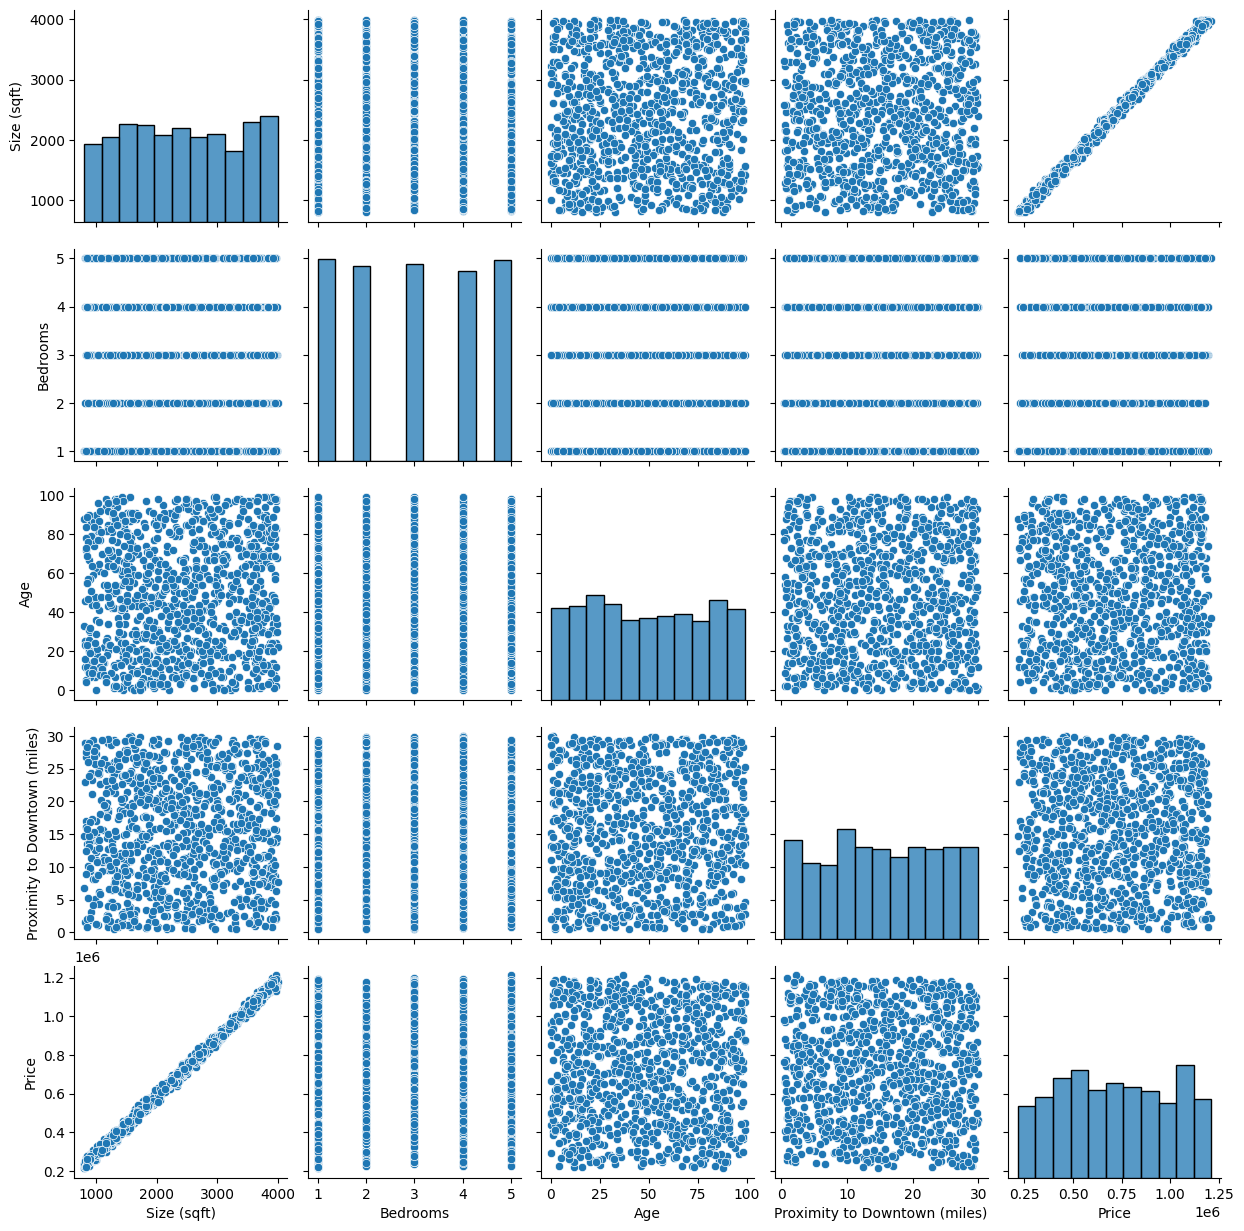

In [9]:
sns.pairplot(df)
plt.show()

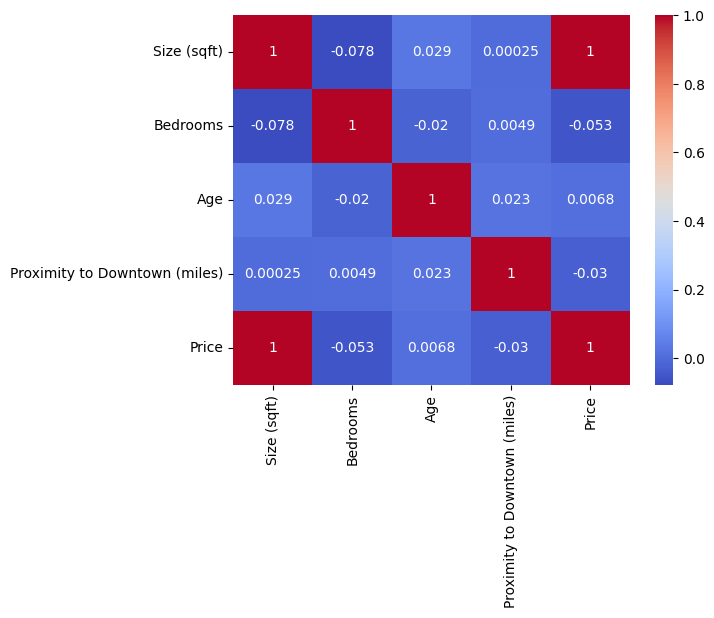

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Data Preprocessing

In [11]:
df = df.dropna()

In [13]:
X = df
y = df['Price']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Development

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [17]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adjusted_r2}')

Mean Squared Error: 1.2925722775100623e-20
R-squared: 1.0
Adjusted R-squared: 1.0


In [20]:
print('Model Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

Model Coefficients:
Size (sqft): 2.1229667990185738e-10
Bedrooms: 5.820766091346741e-11
Age: -1.2732925824820995e-11
Proximity to Downtown (miles): -2.7284841053187847e-12
Price: 278842.29020693584


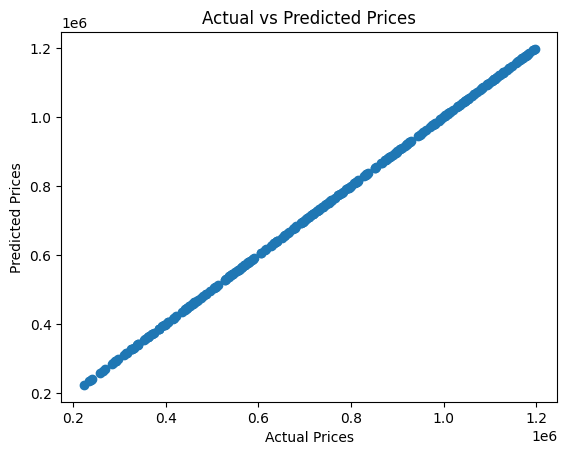

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Report

In [24]:
report = """
DATA PREPROCESSING
I started by reading the dataset using the pandas library. This step helped me to have a look at the structure of my data and identify some key features.
 Scatter plots to visualize the relationships between features(Size, Bedrooms, Age. Proximity to Downtown) and target column (Price). In this we could identify linear relationship.

MODEL DEVELOPMENT
A multiple linear regression model was trained using the LinearRegression class from Scikit-learn. The.fit method is used to train the model on the training data.

MODEL EVALUATION
Model performance was checked with numbers, the Mean Squared Error (MSE), R-squared, and Adjusted R-squared for the model.
I plotted the expected vs actual numbers to verify our modeling accuracy visually. As much as possible, points should lie in the proximity of this diagonal line suggesting that scores are right on target.

CHALLENGES
The estimates can be biased in cases where data is missed.
Answer: Missing values were treated via mean imputation. This is an obvious approach, but it matters to decide upon random missingness or with some pattern.

VISUALIZATIONS AND FINDINGS
Scatter plots showed that some features such as Size (sq. Out of these variables, the ones Locale (sq. ft) and Proximity to Downtown with positive or near zero correlation showed stronger Linear relationship
 with the target variable(Price).

CONCLUSION
In conclusion, although the model is useful to predict house prices and provides a good initial point using extra features might reduce this bias in housing feature values once more data has
 been validated on real-time circumstances.
"""
print(report)


DATA PREPROCESSING
I started by reading the dataset using the pandas library. This step helped me to have a look at the structure of my data and identify some key features.
 Scatter plots to visualize the relationships between features(Size, Bedrooms, Age. Proximity to Downtown) and target column (Price). In this we could identify linear relationship.

MODEL DEVELOPMENT
A multiple linear regression model was trained using the LinearRegression class from Scikit-learn. The.fit method is used to train the model on the training data.

MODEL EVALUATION
Model performance was checked with numbers, the Mean Squared Error (MSE), R-squared, and Adjusted R-squared for the model. 
I plotted the expected vs actual numbers to verify our modeling accuracy visually. As much as possible, points should lie in the proximity of this diagonal line suggesting that scores are right on target.

CHALLENGES
The estimates can be biased in cases where data is missed.
Answer: Missing values were treated via mean 